In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [4]:
datos = pd.read_excel('modelolineal.xlsx')

In [9]:
datos

,observación,Y,X
0,1,19.246957,23
1,2,16.878501,19
2,3,20.187237,27
3,4,12.176789,13
4,5,21.420112,21
5,6,24.436799,22
6,7,14.507928,19
7,8,16.013496,14
8,9,12.043514,3
9,10,6.808838,1


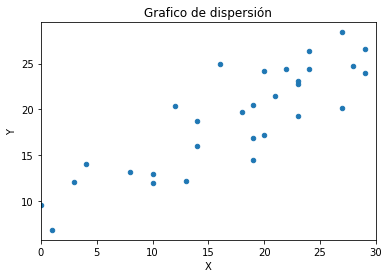

In [17]:
datos.plot('X', 'Y', kind='scatter')
plt.title('Grafico de dispersión')
plt.xlim(0,30)
plt.show()

In [20]:
train_set = datos.iloc[:20]
test_set = datos.iloc[20:]

In [23]:
#construir el modelo con el train set
reg=smf.ols(formula='Y~X', data=train_set)
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     28.80
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           4.23e-05
Time:                        16:33:50   Log-Likelihood:                -51.332
No. Observations:                  20   AIC:                             106.7
Df Residuals:                      18   BIC:                             108.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2336      2.008      4.598      0.0

In [25]:
results.resid #errores desviacion

0    -2.503009
1    -2.694704
2    -3.739491
3    -4.131274
4     0.758526
5     3.231023
6    -5.065277
7    -0.838756
8     1.177355
9    -2.968940
10    0.900404
11    0.659702
12    4.641910
13    7.018625
14   -1.101577
15    0.969441
16    1.828335
17   -2.924812
18    4.496059
19    0.286461
dtype: float64

In [28]:
test_set['Y_hat']=results.predict(test_set) #pronosticar

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4112\269000406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Y_hat']=results.predict(test_set) #pronosticar


In [30]:
test_set

,observación,Y,X,Y_hat
20,21,9.544102,0,9.233587
21,22,24.230330,20,20.117395
22,23,26.417826,24,22.294157
23,24,23.066723,23,21.749966
24,25,13.145005,8,13.587110
25,26,24.385156,24,22.294157
26,27,12.934102,10,14.675491
27,28,14.002469,4,11.410349
28,29,26.599047,29,25.015109
29,30,11.910387,10,14.675491


In [34]:
((test_set['Y']-test_set['Y_hat'])/test_set['Y']).abs().mean()

0.11463006726245328

In [37]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [49]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [51]:
mean_absolute_percentage_error(test_set['Y'], test_set['Y_hat'])

0.11463006726245328

In [53]:
mape(test_set['Y'], test_set['Y_hat'])

0.11463006726245328